# Opentrons Mass Balance Automation 

## Aniket Chitre, Daniil Bash - AMDM Group

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Set Serial Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Real-time Data

In [3]:
def get_mass(port):
    balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
    balance.write('S\r\n'.encode('utf-8'))
    time.sleep(1)
    result  = balance.read_until('\r\n'.encode('utf-8'))
    value = str(result[7:14].decode("utf-8"))
    if (value.strip() != '-------') and (value.strip() != ''):
        return (True,float(value))
    return (False,-1)

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
-0.001
-0.001
-0.001
-0.003
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
0.0
0.0
0.0
0.0
-0.001
-0.001
-0.001
-0.002
-0.002
0.0
0.0
0.0
-0.001
-0.001
0.0
-0.001
0.0
0.0
-0.003
-0.004
-0.004
-0.004
-0.004
-0.004
-0.004
-0.003
0.979
0.979
0.98
0.979
2.937
2.937
2.937
2.937
3.916
3.916
3.92
3.92
4.925
4.925
4.927
4.927
5.904
5.904
5.905
5.905
6.885
6.885
6.885
6.885
7.817
7.816
7.816
8.747
8.747
8.747
8.748
9.758
9.758
9.758
9.757
10.765
10.765
10.767
10.767
11.775
11.778
11.777
11.776
12.786
12.786
12.785
12.786
13.795
13.795
13.791
13.793
14.801
14.801
14.801
14.801
15.809
15.809
15.809
16.526
16.526
16.525
16.525
17.271
17.271
17.273
17.273
18.279
18.279
18.278
18.277
19.285
19.285
19.284
19.285
20.291
20.291
20.289
20.291
21.296
21.296
21.296
21.295
22.302
22.302
22.301
22.3
23.302
23.302
23.302
23.302
24.303
24.303
24.304
25.15
25.146
25.146
25.99
25.99
25.989
25.988
26.969
26.968
26.967
26.966
27.973
27.973
27.971
27.971
28.951
28.951
28.949
28.949
29.961
29.961
29.956
29.956


60.321
60.321
60.321
60.321
60.321
60.321
60.32
60.32
60.319
60.319
60.319
60.318
60.318
60.317
60.317
60.317
60.317
60.317
60.318
60.317
60.316
60.316
60.316
60.316
60.315
60.315
60.315
60.315
60.314
60.313
60.313
60.313
60.312
60.312
60.312
60.311
60.311
60.311
60.311
60.311
60.311
60.31
60.31
60.31
60.309
60.308
60.308
60.308
60.307
60.307
60.307
60.306
60.306
60.306
60.307
60.306
60.305
60.305
60.305
60.305
60.305
60.303
60.303
60.303
60.303
60.303
60.303
60.302
60.302
60.302
60.3
60.3
60.3
60.3
60.3
60.3
60.3
60.3
60.299
60.299
60.298
60.297
60.297
60.297
60.297
60.297
60.297
60.296
60.296
60.296
60.296
60.296
60.296
60.295
60.295
60.295
60.295
60.295
60.295
60.295
60.293
60.293
60.293
60.293
60.293
60.291
60.291
60.291
60.291
60.291
60.291
60.29
60.289
60.289
60.289
60.289
60.289
60.287
60.287
60.288
60.287
60.286
60.286
60.286
60.286
60.286
60.285
60.285
60.284
60.284
60.284
60.284
60.284
60.284
60.284
60.283
60.283
60.282
60.282
60.281
60.281
60.281
60.28
60.28
60.28
60.279
60.

KeyboardInterrupt: 

In [7]:
results = {'Time': x, 'Mass': mass}

In [8]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1595,3190,60.206
1596,3192,60.208
1597,3194,60.207
1598,3196,60.207


<IPython.core.display.Javascript object>


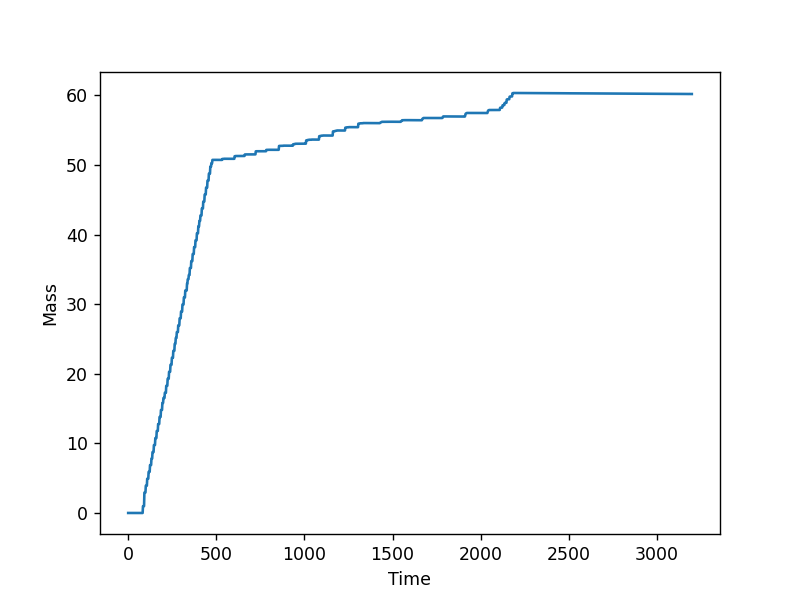

In [9]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [10]:
mass_df.to_csv('mass_data/MassProfile_131222_S19-24_run1.csv')